In [336]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [337]:
data = np.loadtxt(fname='Breast_cancer_data.txt')
#data = np.loadtxt(fname='Sample_test_data.txt')

X = data[:,:9]
L = data[:,9]
X = X.astype(int)
L = L.astype(int)
m = (L==0)
m = m.astype(int)

X_n = data.shape[0]
T2 = np.r_[L,m]
T2 = T2.reshape(2,X_n).T
K = 2
N = X_n

X_range0 = [-12,12]
X_range1 = [-12,12]

print(X_n)
print(X[:5,:])
print(T2[:5,:])

print(T2.shape)

583
[[6 8 7 8 6 8 8 9 1]
 [1 1 1 1 5 1 3 1 1]
 [4 2 4 3 2 2 2 1 1]
 [2 1 1 1 3 1 2 1 1]
 [3 1 1 1 2 1 1 1 1]]
[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]
(583, 2)


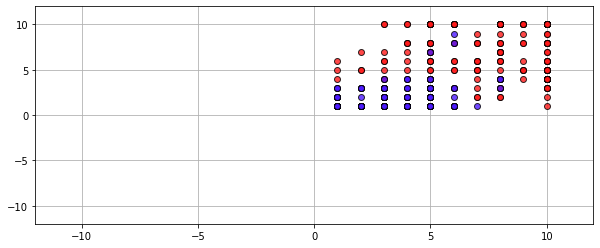

In [338]:
def show_data10(x,t):
    wk, K = t.shape
    #c = [[0.5,0.5,0.5], [1,1,1], [0,0,0]]
    c = [[1,0.1,0.1], [0.3,0.1,1],[0.1,1,0.2]]
    for k in range(K):
        plt.plot(x[t[:,k]==1,0], x[t[:,k]==1,1],
                 linestyle='none', markeredgecolor='black', marker='o',
                 color = c[k], alpha=0.8)
        plt.grid(True)
        
plt.figure(figsize=(10,4))
show_data10(X,T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.show()

In [339]:
def logistic10(x,w):
    exponential = np.zeros(x.shape[0])
    
    for i in range(x.shape[1]):
        exponential = exponential + w[i]*x[:,i]
    exponential = exponential + w[len(w)-1]
      
    y = 1/(1+np.exp(-(exponential)))

    return y

def cee_logistic10(w,x,t):
    X_n = x.shape[0]
    y = logistic10(x,w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n,1]*np.log(y[n])+(1-t[n,1])*np.log(1-y[n]))

    cee = cee/X_n
    return cee

def dcee_logistic10(w,x,t):
    X_n = x.shape[0]
    y = logistic10(x,w)
    dcee = np.zeros(x.shape[1]+1)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n]-t[n,1])*x[n,0]
        dcee[1] = dcee[1] + (y[n]-t[n,1])*x[n,1]
        dcee[2] = dcee[2] + (y[n]-t[n,1])*x[n,2]
        dcee[3] = dcee[3] + (y[n]-t[n,1])*x[n,3]
        dcee[4] = dcee[4] + (y[n]-t[n,1])*x[n,4]
        dcee[5] = dcee[5] + (y[n]-t[n,1])*x[n,5]
        dcee[6] = dcee[6] + (y[n]-t[n,1])*x[n,6]
        dcee[7] = dcee[7] + (y[n]-t[n,1])*x[n,7]
        dcee[8] = dcee[8] + (y[n]-t[n,1])*x[n,8]
        dcee[9] = dcee[9] + (y[n]-t[n,1])*1
    dcee = dcee/X_n
    #print(dcee)
    return dcee

#W = [-1, -5, -0.5, -6, -1, -0.5, 10, 1, -1, -1]
W = [ -1, -1, -1, -1, -1, -1, -1, -1, -1,-1]
dcee_logistic10(W,X,T2)
cee_logistic10(W,X,T2)




10.5574632423707

In [359]:
from scipy.optimize import minimize

def fit_logistic10(w_init,x,t):
    res = minimize(cee_logistic10,w_init,args=(x,t),
                  jac=dcee_logistic10,method="CG")
    return res.x

#W_init = [ -1, -1, -1, -1, -1, -1, -1, -1, -1,-1]
W_init = [0,0,0,0,0,0,0,0,0,0]
W = fit_logistic10(W_init,X,T2)

strW = "W = [ "
for i in range(W.shape[0]) :
    strW = strW + "{0:.3f}  ".format(W[i])
strW = strW + "]"
print(strW)

cee = cee_logistic10(W,X,T2)
print("CEE = {0:f}".format(cee))

np.savetxt('2014140039.txt',W,fmt='%.3f',delimiter=',',newline=' ')


W = [ -0.574  0.063  -0.296  -0.437  -0.109  -0.377  -0.426  -0.192  -0.392  10.054  ]
CEE = 0.080890


In [369]:
def kfold_validation_func(w,x,t,k):
    n = x.shape[0]
    mean_CEE_train = np.zeros(k)
    mean_CEE_test = np.zeros(k)
    W_res = np.zeros(k*len(w))
    W_res = W_res.reshape(k,len(w))
    W_init = w
    for i in range(0,k):
        x_train = x[np.fmod(range(n),k) != i]
        t_train = t[np.fmod(range(n),k) != i]
        x_test = x[np.fmod(range(n),k) == i]
        t_test = t[np.fmod(range(n),k) == i]
        
        wm = fit_logistic10(W_init,x_train,t_train)
        
        mean_CEE_train[i] = cee_logistic10(wm,x_train,t_train)
        mean_CEE_test[i] = cee_logistic10(wm,x_test,t_test)
        W_res[i] = wm
        print("{0} : [{1}], [{2}]\tW : {3}".format(i,mean_CEE_train[i],mean_CEE_test[i],wm))
    return mean_CEE_train,mean_CEE_test, W_res
        

0 : [0.08440746144521756], [0.03153385496112653]	W : [-0.59551177  0.07062516 -0.31825609 -0.42640419 -0.11431412 -0.35254297
 -0.39074446 -0.19009631 -0.37550222  9.97984355]
1 : [0.08247604371144193], [0.06566399696712899]	W : [-0.50692472  0.01798603 -0.3256684  -0.37713378 -0.13090936 -0.40104365
 -0.35302964 -0.18329045 -0.39066094  9.62245473]
2 : [0.08306469520886535], [0.0499183373162775]	W : [-0.5586036   0.05912884 -0.29447953 -0.42205119 -0.13383662 -0.37575672
 -0.4023838  -0.17586435 -0.4154457   9.94529567]
3 : [0.0845842471886849], [0.029436823712805243]	W : [-0.52702391  0.07103938 -0.32574447 -0.43831113 -0.10136058 -0.35119813
 -0.44717604 -0.1964742  -0.37189934  9.8560681 ]
4 : [0.08348829479602313], [0.048021243652266704]	W : [-0.57178288  0.03899713 -0.25478274 -0.44925645 -0.10033714 -0.40153759
 -0.41877155 -0.14843845 -0.34496907  9.90746728]
5 : [0.07362458756191813], [0.25317703023211435]	W : [-5.58378969e-01 -2.37602479e-01 -3.64560317e-01 -2.89582759e-01
  

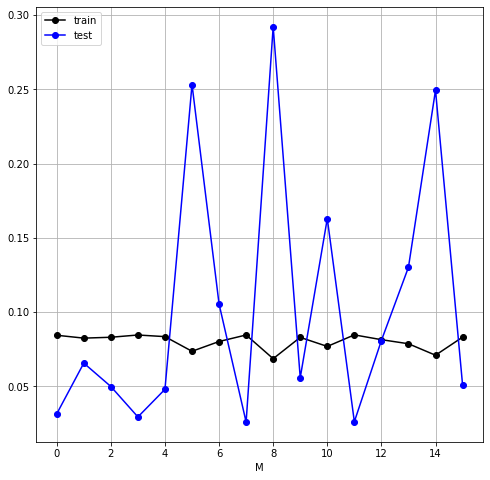

In [370]:
K = 16
Cv_Gauss_train, Cv_Gauss_test, W_res=kfold_validation_func(W_init,X,T2,16)

plt.figure(figsize=(8,8))

plt.plot(range(K),Cv_Gauss_train,'k-o',label='train')
plt.plot(range(K),Cv_Gauss_test,'b-o',label='test')
plt.legend(loc='upper left')
plt.grid(True)
plt.xlabel('M')
plt.show()

In [387]:
print(np.mean(W_res[:,0]))
Wm = np.zeros(W_res.shape[1])
for i in range(W_res.shape[1]):
    print(np.mean(W_res[:,i]))
    Wm[i] = np.mean(W_res[:,i])


-0.5776969313416707
-0.5776969313416707
0.057763517676648765
-0.301273543153543
-0.43648682604051037
-0.10474078111718438
-0.3794270850903221
-0.42775914848621954
-0.1954303119298057
-0.3919533305363759
10.113632673524467
(16, 10)


In [389]:
def validate_model(w):
    #d = np.loadtxt(fname="Sample_test_data.txt")
    #d = np.loadtxt(fname="Breast_cancer_data.txt")
    #d = np.loadtxt(fname="midTerm_total_data.txt")
    d = np.loadtxt(fname="UCI_test_set.txt")
    X = d[:,:9].astype(int)
    T = d[:,9].astype(int)
    
    N = X.shape[0]
    
    y = np.zeros(N)
    decision = np.zeros(N).astype(int)
    err_cnt = 0
    
    print('No. \t V \t T')
    print('--------------------')
    for i in range(N):
        x = np.r_[X[i,:],1]
        u = np.array(w).dot(x)
        y[i] = 1 / ( 1 + np.exp(-u))
        if y[i] < 0.5 :
            decision[i] = 1
        
        if decision[i] != T[i] :
            err_cnt = err_cnt + 1
        
        print('{0} \t {1} \t {2}'.format(i,decision[i], T[i]))
        
    hit_ratio = np.round((1-err_cnt/N)*100,1)
    
    print('--------------------')
    print('Total error : {0} out of {1}'.format(err_cnt,N))
    print('Hit ratio : {0:.1f} %'.format(hit_ratio))
    
    return hit_ratio

StudentID = "2014140039"
W = np.loadtxt(fname = StudentID+".txt")
#W = Wm

print("Student ID: " + StudentID)
print("W = "+np.str(W))
print("\n")

validate_model(W)

Student ID: 2014140039
W = [-0.574  0.063 -0.296 -0.437 -0.109 -0.377 -0.426 -0.192 -0.392 10.054]


No. 	 V 	 T
--------------------
0 	 0 	 0
1 	 1 	 0
2 	 0 	 0
3 	 1 	 0
4 	 0 	 0
5 	 1 	 1
6 	 0 	 0
7 	 0 	 0
8 	 0 	 0
9 	 0 	 0
10 	 0 	 0
11 	 0 	 0
12 	 0 	 1
13 	 0 	 0
14 	 1 	 1
15 	 1 	 1
16 	 0 	 0
17 	 0 	 0
18 	 1 	 1
19 	 0 	 0
20 	 1 	 1
21 	 1 	 1
22 	 0 	 0
23 	 0 	 0
24 	 1 	 1
25 	 0 	 0
26 	 0 	 0
27 	 0 	 0
28 	 0 	 0
29 	 0 	 0
30 	 0 	 0
31 	 1 	 1
32 	 0 	 0
33 	 0 	 0
34 	 0 	 0
35 	 1 	 1
36 	 0 	 0
37 	 1 	 1
38 	 1 	 1
39 	 1 	 1
40 	 1 	 1
41 	 0 	 1
42 	 1 	 1
43 	 0 	 0
44 	 1 	 1
45 	 0 	 0
46 	 0 	 0
47 	 1 	 1
48 	 1 	 1
49 	 0 	 1
50 	 1 	 1
51 	 1 	 1
52 	 1 	 1
53 	 1 	 1
54 	 1 	 1
55 	 1 	 1
56 	 1 	 1
57 	 1 	 1
58 	 1 	 1
59 	 0 	 0
60 	 1 	 1
61 	 0 	 1
62 	 0 	 0
63 	 1 	 1
64 	 0 	 0
65 	 1 	 1
66 	 1 	 1
67 	 0 	 0
68 	 0 	 0
69 	 1 	 1
70 	 0 	 0
71 	 1 	 1
72 	 1 	 1
73 	 0 	 0
74 	 0 	 0
75 	 0 	 0
76 	 0 	 0
77 	 0 	 0
78 	 0 	 0
79 	 0 

97.1

In [ ]:
def validate_model2(w):
    #d = np.loadtxt(fname="Sample_test_data.txt")
    #d = np.loadtxt(fname="Breast_cancer_data.txt")
    #d = np.loadtxt(fname="midTerm_total_data.txt")
    d = np.loadtxt(fname="UCI_test_set.txt")
    X = d[:,:9].astype(int)
    T = d[:,9].astype(int)
    
    N = X.shape[0]
    
    y = np.zeros(N)
    decision = np.zeros(N).astype(int)
    err_cnt = 0
    
    print('No. \t V \t T')
    print('--------------------')
    for i in range(N):
        x = np.r_[X[i,:],1]
        u = np.array(w).dot(x)
        y[i] = 1 / ( 1 + np.exp(-u))
        if y[i] < 0.5 :
            decision[i] = 1
        
        if decision[i] != T[i] :
            err_cnt = err_cnt + 1
        
        print('{0} \t {1} \t {2}'.format(i,decision[i], T[i]))
        
    hit_ratio = np.round((1-err_cnt/N)*100,1)
    
    print('--------------------')
    print('Total error : {0} out of {1}'.format(err_cnt,N))
    print('Hit ratio : {0:.1f} %'.format(hit_ratio))
    
    return hit_ratio